# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

#### Practice

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Example = record = sample

## Sanity check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.memory_usage().sum()/1024

108.4921875

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df[["MAKE","MODEL", "VEHICLECLASS", "TRANSMISSION"]].describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION
count,1067,1067,1067,1067
unique,39,663,16,22
top,FORD,F150 FFV,MID-SIZE,A6
freq,90,8,178,222


<function matplotlib.pyplot.show(close=None, block=None)>

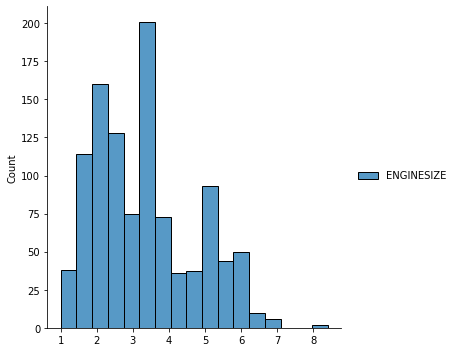

In [11]:
sns.displot(data = df[["ENGINESIZE"]])
plt.show

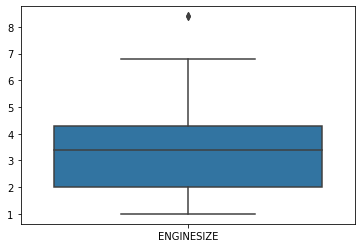

In [12]:
sns.boxplot(data = df[["ENGINESIZE"]])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

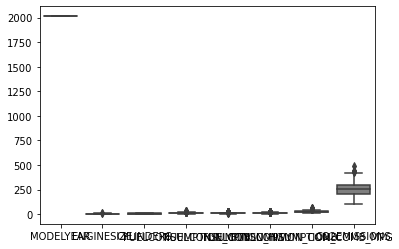

In [13]:
sns.boxplot(data = df) #boxolot, violinplot, boxenplot
plt.show

In [14]:

#long tails = outliner = noise ( left long tails/ right longtails)

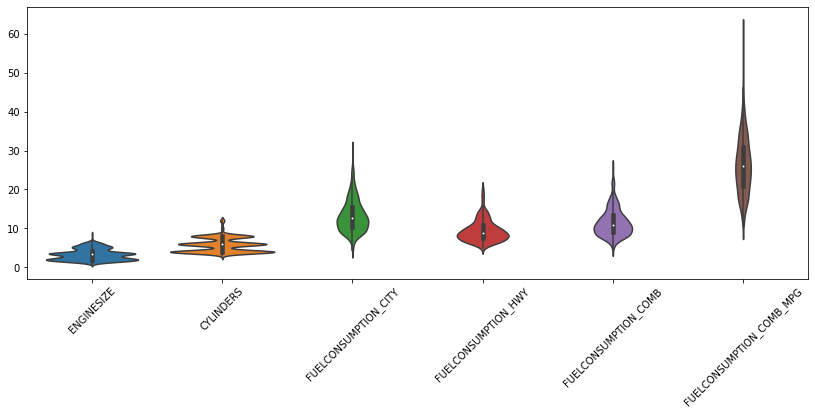

In [15]:
plt.figure(figsize=(14,5))
sns.violinplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.xticks(rotation=45)
plt.show()

In [16]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [18]:
df.drop(columns = "MODELYEAR").corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [19]:
df.MODELYEAR.unique()

array([2014])

<function matplotlib.pyplot.show(close=None, block=None)>

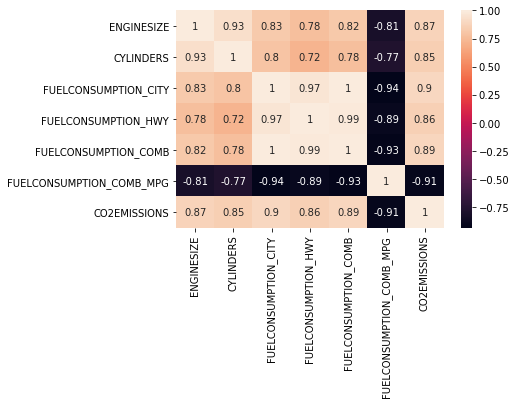

In [22]:
sns.heatmap(df.drop(columns = "MODELYEAR").corr(), annot= True, linecolor = "black")
plt.show
#annot : number display
#corr: tuong quan
# tuong quan cao thi nen loai 1 bien hoac ket hop vao mot bien

Correlation
- Feature vs Feature
- Feature vs Labels


Pre-feature selections:
- Corr()
- P-value
- K-S

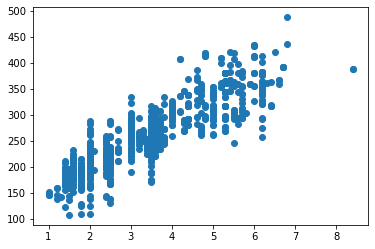

In [25]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#chia du lieu: k-cross validation

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(df[["ENGINESIZE"]], df.CO2EMISSIONS, test_size = 0.2, random_state = 42) #80-20, 70-30
# random_state: co dinh ban ghi
X_train.shape,Y_train.shape, X_test.shape, Y_test.shape

((853, 1), (853,), (214, 1), (214,))

In [33]:
model = LinearRegression() #Manual, Gridsearch, RandomSearch,...
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
model.coef_

array([38.99297872])

In [35]:
model.intercept_

126.2897021740873

In [36]:
pred1 = model.predict(X_test)
#pred =  model_coef * X_test +model.intercept | y= ax+b
pred1

array([309.55670218, 262.76512771, 266.66442558, 243.26863835,
       204.27565962, 243.26863835, 266.66442558, 282.26161707,
       321.2545958 , 266.66442558, 266.66442558, 387.54265963,
       251.06723409, 262.76512771, 266.66442558, 262.76512771,
       188.67846813, 266.66442558, 188.67846813, 332.95248941,
       321.2545958 , 196.47706388, 251.06723409, 270.56372345,
       243.26863835, 196.47706388, 204.27565962, 188.67846813,
       340.75108516, 251.06723409, 336.85178729, 219.87285111,
       196.47706388, 321.2545958 , 243.26863835, 309.55670218,
       282.26161707, 332.95248941, 204.27565962, 223.77214899,
       188.67846813, 188.67846813, 180.87987239, 223.77214899,
       282.26161707, 188.67846813, 243.26863835, 243.26863835,
       204.27565962, 329.05319154, 368.04617027, 266.66442558,
       204.27565962, 270.56372345, 243.26863835, 332.95248941,
       332.95248941, 348.5496809 , 204.27565962, 293.95951069,
       282.26161707, 293.95951069, 297.85880856, 266.66

In [44]:
pred2  =  model.coef_[0]*X_test + model.intercept_ 
pred2

,ENGINESIZE
732,309.556702
657,262.765128
168,266.664426
86,243.268638
411,204.275660
...,...
963,204.275660
294,219.872851
275,219.872851
903,243.268638


In [49]:
comparison = pd.DataFrame()
comparison[["Manual"]] = pred2
comparison[["Auto"]] = pred1
comparison.head(3)

,Manual,Auto
732,309.556702,309.556702
657,262.765128,262.765128
168,266.664426,266.664426


In [52]:
mean_squared_error(y_test,pred1)

985.9381692274995

In [53]:
mean_absolute_error(y_test,pred1)

24.097257411707837

In [54]:

r2_score(y_test,pred1)

0.7615595731934374